In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
df.shape

(614, 13)

### Outlier Identification Methods

- Describe method can be used to identify the outlier in the data. But it is not the best method to identify the outlier in the data like in the describe below. 
- In cases of Age feature present in the data, we say that we can identify outlier using describe method.

In [57]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## 2. Scatterplot is a method for identify outlier in the data

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

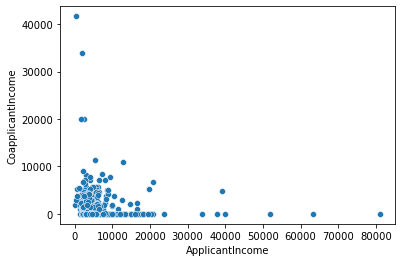

In [58]:
sns.scatterplot(x = 'ApplicantIncome', y = 'CoapplicantIncome', data = df)

### 3. Boxplot - is the powerful way to identify outlier using visuals

<AxesSubplot:xlabel='ApplicantIncome'>

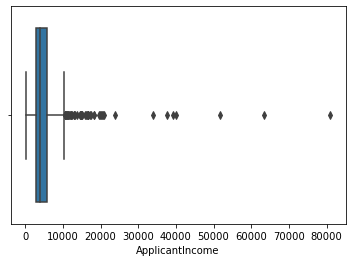

In [59]:
sns.boxplot(x = 'ApplicantIncome', data = df)

<AxesSubplot:xlabel='LoanAmount'>

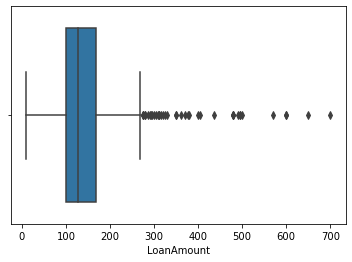

In [60]:
sns.boxplot(x = 'LoanAmount', data = df)

### 4. Outlier identification using IQR method
- Inter Quartile Range - Q3 - Q1
- Q3 - df.quantile(0.75)
- Q1 - df.qunatile(0.25)

In [61]:
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)
IQR = Q3 - Q1
IQR

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             68.00
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64

In [62]:
(df < (Q1 - 1.5 * IQR)) | (df > (Q3 +  1.5 * IQR))

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,True,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


## 5. Outlier Identification using skew method

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

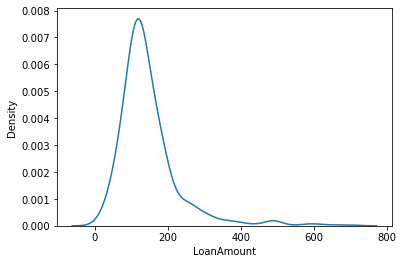

In [63]:
sns.kdeplot(x = 'LoanAmount', data = df)

In [64]:
df['LoanAmount'].skew()

2.677551679256059

### Interpreting outlier using skew method

- The output of the skew should be as close to zero as possible. This indicate the outliers are present but therre is not hugh difference between the actual values and the outlier value
- The output of skew if is very big number then this indicates the outliers are present but there is very hugh difference betwen the actual values and the outlier values

In [65]:
data = sns.load_dataset('iris')

In [66]:
data['sepal_width'].skew()

0.31896566471359966

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

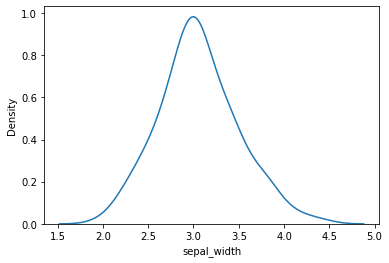

In [67]:
sns.kdeplot(x = 'sepal_width', data = data)

## Outlier Treament

### Quantile based Flooring and capping

In [68]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
print(df['LoanAmount'].quantile(0.15))
print(df['LoanAmount'].quantile(0.85))

84.64999999999999
192.0


In [70]:
df['LoanAmount'] = np.where(df['LoanAmount'] < 84, 84, df['LoanAmount'])
df['LoanAmount'] = np.where(df['LoanAmount'] > 192, 192, df['LoanAmount'])

In [71]:
df['LoanAmount'].skew()

0.2945655441012737

<AxesSubplot:xlabel='LoanAmount'>

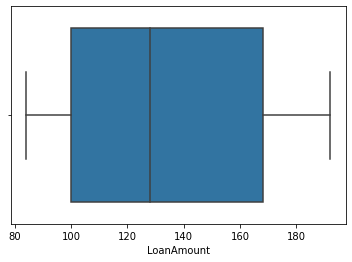

In [72]:
sns.boxplot(x = 'LoanAmount', data =df)

In [73]:
arr = np.array([1,2,3,4,5,6,7,8,9,10])
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [74]:
## np.where(condition, value, location)

np.where(arr % 2 == 0, 100, arr)

array([  1, 100,   3, 100,   5, 100,   7, 100,   9, 100])

### 2. Trimming

<AxesSubplot:xlabel='ApplicantIncome'>

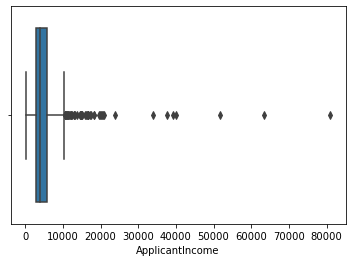

In [75]:
sns.boxplot(x = 'ApplicantIncome',data = df)

In [76]:
df['ApplicantIncome'].skew()

6.539513113994625

In [85]:
a = df['ApplicantIncome'].quantile(0.15)
b = df['ApplicantIncome'].quantile(0.85)
print(a)
print(b)

2702.15
6040.799999999999


In [86]:
ind = (df['ApplicantIncome'] > b) | (df['ApplicantIncome'] < a)
ind.sum()

148

In [87]:
ind = df[(df['ApplicantIncome'] > b) | (df['ApplicantIncome'] < a)].index
ind

Int64Index([  3,   6,  11,  19,  20,  22,  35,  42,  48,  58,
            ...
            568, 573, 574, 580, 586, 592, 596, 605, 611, 612],
           dtype='int64', length=148)

#### 124 is the total outliers in the data for only Applicant income column. 

In [88]:
df['ApplicantIncome'] = df['ApplicantIncome'].drop(ind)
df['ApplicantIncome'].skew()

0.602590443853237

<AxesSubplot:xlabel='ApplicantIncome'>

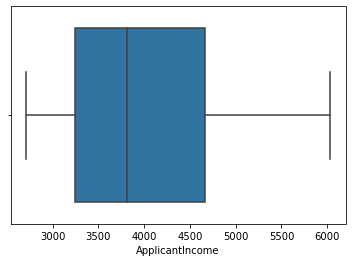

In [89]:
sns.boxplot(x= 'ApplicantIncome', data =df)

### 3. Log Transformation method

In [90]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='LoanAmount'>

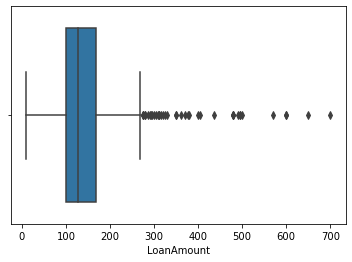

In [3]:
sns.boxplot(x = 'LoanAmount',data = df)

In [92]:
df['CoapplicantIncome'].skew()

7.491531216657306

In [4]:
df['CoapplicantIncome'] = np.log(df['LoanAmount'])
df['CoapplicantIncome'].skew()

-0.19299810452881644

<AxesSubplot:xlabel='LoanAmount'>

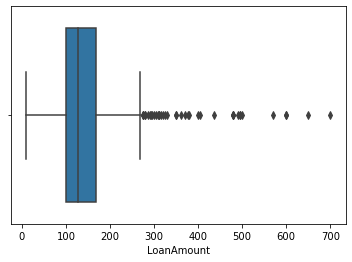

In [5]:
sns.boxplot(x = 'LoanAmount', data =df)

### Observation:
- Log Transformation method is not the best method for treating outlier present in the CoapplicantIncome.
- Try outlier treatment using capping or trimming method

In [103]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [106]:
data['total_bill'].skew()

1.1332130376158205

<AxesSubplot:xlabel='total_bill'>

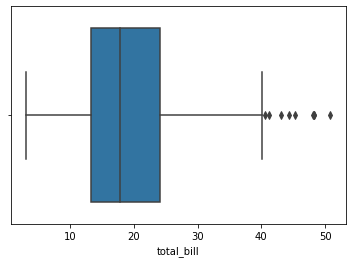

In [104]:
sns.boxplot(x = 'total_bill', data =data)

In [107]:
data['total_bill'] = np.log(data['total_bill'])
data['total_bill'].skew()

-0.11623079290253824

<AxesSubplot:xlabel='total_bill'>

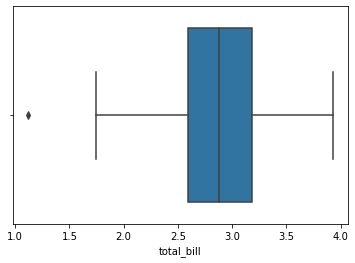

In [108]:
sns.boxplot(x = 'total_bill', data =data)

### 4. Replacing Outliers with median values

In [122]:
df = pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [112]:
print(df['LoanAmount'].quantile(0.90))

235.79999999999995


<AxesSubplot:xlabel='LoanAmount'>

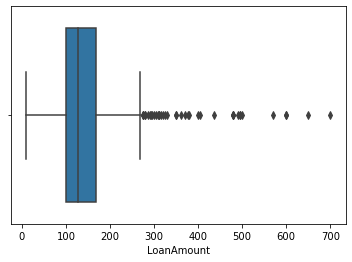

In [111]:
sns.boxplot(x= 'LoanAmount', data = df)

In [115]:
df['LoanAmount'].skew()

2.677551679256059

In [113]:
print(df['LoanAmount'].quantile(0.50))

128.0


In [114]:
print(df['LoanAmount'].median())

128.0


In [116]:
df['LoanAmount'] = np.where(df['LoanAmount'] > df['LoanAmount'].quantile(0.90), 128, df['LoanAmount'])
df['LoanAmount'].skew()

0.07803769247771282

<AxesSubplot:xlabel='LoanAmount'>

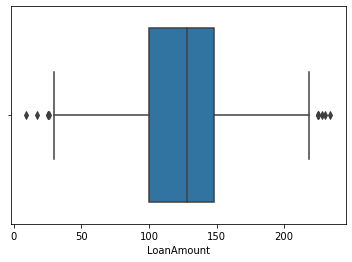

In [117]:
sns.boxplot(x= 'LoanAmount', data = df)

### 5. IQR Score

In [123]:
df.shape

(614, 13)

In [118]:
(df < (Q1 - 1.5 * IQR)) | (df > (Q3 +  1.5 * IQR))

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,True,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [124]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 +  1.5 * IQR))).any(axis = 1)]
df_out.shape

(398, 13)